In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Triangle shape: (4, 2)
Homogenous Triangle shape: (4, 3)
axs shape: (6,)


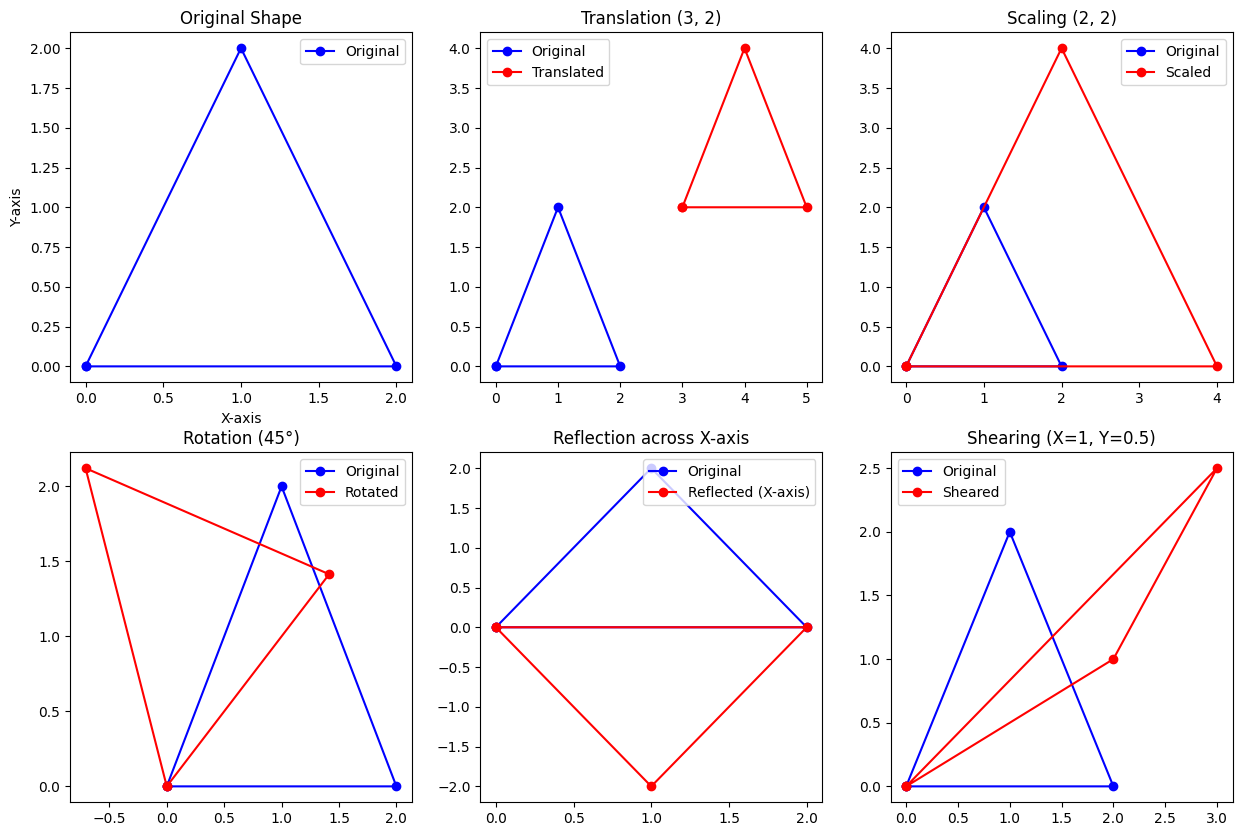

In [2]:
# Define the original shape (Triangle)
triangle = np.array([[0, 0], [2, 0], [1, 2], [0, 0]])  # Closed shape
print("Triangle shape:",triangle.shape)

# Homogeneous coordinates for the triangle
homogeneous_triangle = np.c_[triangle, np.ones(len(triangle))]
print("Homogenous Triangle shape:",homogeneous_triangle.shape)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()  # Flatten the axes for easier indexing
print("axs shape:",axs.shape)

# Original Shape
axs[0].plot(triangle[:, 0], triangle[:, 1], 'bo-', label="Original")
axs[0].set_title("Original Shape")
axs[0].set_xlabel("X-axis")
axs[0].set_ylabel("Y-axis")
axs[0].legend()

# 1. Translation
tx, ty = 3, 2
translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
translated_triangle = np.dot(homogeneous_triangle, translation_matrix.T)
axs[1].plot(triangle[:, 0], triangle[:, 1], 'bo-', label="Original")
axs[1].plot(translated_triangle[:, 0], translated_triangle[:, 1], 'ro-', label="Translated")
axs[1].set_title("Translation (3, 2)")
axs[1].legend()

# 2. Scaling
sx, sy = 2, 2
scaling_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
scaled_triangle = np.dot(homogeneous_triangle, scaling_matrix.T)
axs[2].plot(triangle[:, 0], triangle[:, 1], 'bo-', label="Original")
axs[2].plot(scaled_triangle[:, 0], scaled_triangle[:, 1], 'ro-', label="Scaled")
axs[2].set_title("Scaling (2, 2)")
axs[2].legend()

# 3. Rotation
angle = 45
rad = np.radians(angle)
rotation_matrix = np.array([[np.cos(rad), -np.sin(rad), 0],
                            [np.sin(rad), np.cos(rad), 0],
                            [0, 0, 1]])
rotated_triangle = np.dot(homogeneous_triangle, rotation_matrix.T)
axs[3].plot(triangle[:, 0], triangle[:, 1], 'bo-', label="Original")
axs[3].plot(rotated_triangle[:, 0], rotated_triangle[:, 1], 'ro-', label="Rotated")
axs[3].set_title("Rotation (45°)")
axs[3].legend()

# 4. Reflection (X-axis)
reflection_matrix_x = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
reflected_triangle = np.dot(homogeneous_triangle, reflection_matrix_x.T)
axs[4].plot(triangle[:, 0], triangle[:, 1], 'bo-', label="Original")
axs[4].plot(reflected_triangle[:, 0], reflected_triangle[:, 1], 'ro-', label="Reflected (X-axis)")
axs[4].set_title("Reflection across X-axis")
axs[4].legend()

# 5. Shearing
shx, shy = 1, 0.5
shearing_matrix = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
sheared_triangle = np.dot(homogeneous_triangle, shearing_matrix.T)
axs[5].plot(triangle[:, 0], triangle[:, 1], 'bo-', label="Original")
axs[5].plot(sheared_triangle[:, 0], sheared_triangle[:, 1], 'ro-', label="Sheared")
axs[5].set_title("Shearing (X=1, Y=0.5)")
axs[5].legend()

# Adjust layout and show the plot
plt.show()


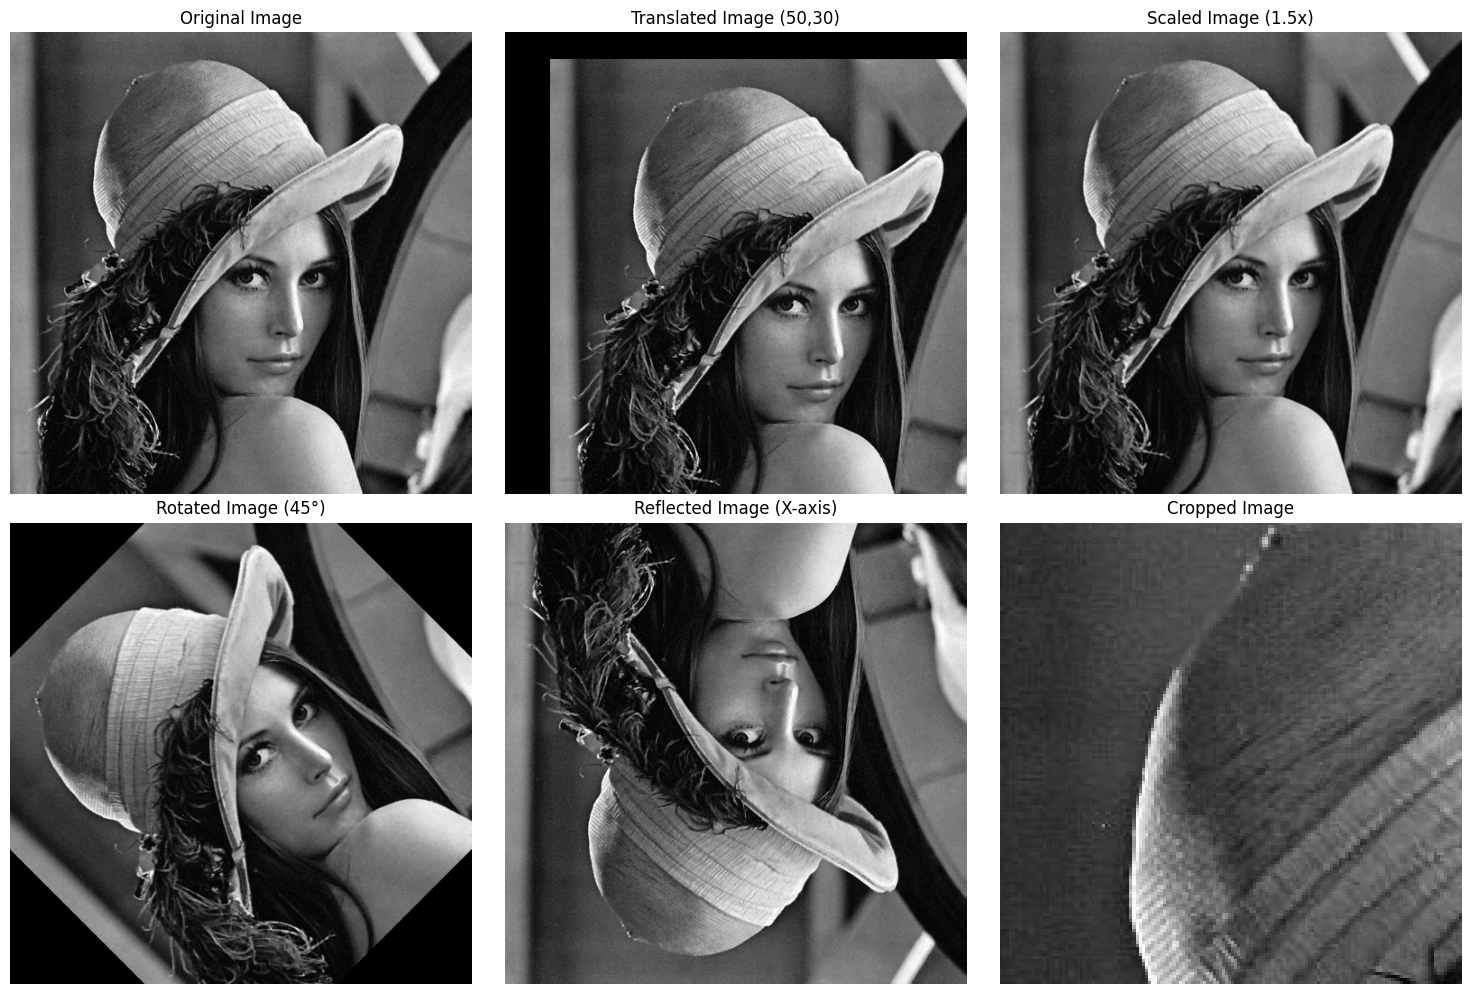

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image
image = cv2.imread('/content/drive/MyDrive/Lab-1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Prepare Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()  # Flatten axes for easy iteration

# Original Image
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis('off')

# *1. Image Translation*
height, width = image.shape[:2]
tx, ty = 50, 30
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(image, translation_matrix, (width, height))

axs[1].imshow(translated_image)
axs[1].set_title("Translated Image (50,30)")
axs[1].axis('off')

# *2. Scaling*
fx, fy = 1.5, 1.5
scaled_image = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

axs[2].imshow(scaled_image)
axs[2].set_title("Scaled Image (1.5x)")
axs[2].axis('off')

# *3. Rotation*
angle = 45
rotation_matrix = cv2.getRotationMatrix2D((width // 2, height // 2), angle, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

axs[3].imshow(rotated_image)
axs[3].set_title("Rotated Image (45°)")
axs[3].axis('off')

# *4. Reflection (Flip)*
reflected_image_x = cv2.flip(image, 0)  # Flip vertically (X-axis)

axs[4].imshow(reflected_image_x)
axs[4].set_title("Reflected Image (X-axis)")
axs[4].axis('off')

# *5. Cropping*
x1, y1, x2, y2 = 50, 50, 200, 200
cropped_image = image[y1:y2, x1:x2]

axs[5].imshow(cropped_image)
axs[5].set_title("Cropped Image")
axs[5].axis('off')

# Adjust Layout and Display
plt.tight_layout()
plt.show()
